In [32]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# Load the dataset
df = pd.read_csv("creditcard.csv")

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
# check for non-null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

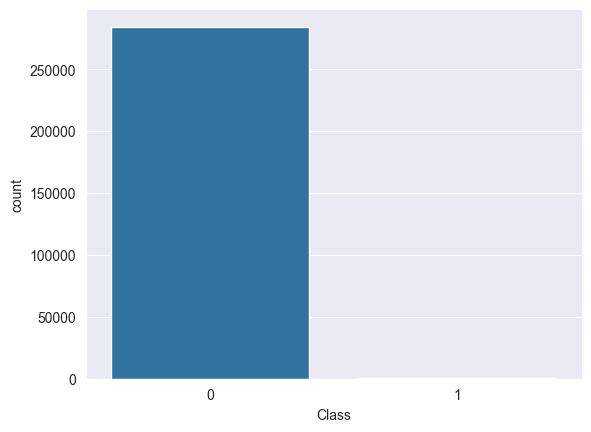

In [39]:
# sns.countplot(df['Class'])
sns.countplot(x='Class', data=df)

Звідси бачим, що датасет дуже не збалансований, а це може призвести до проблеми незбалансованості класів, коли модель навчається добре класифікувати легітимні транзакції, але погано розпізнає шахрайські. Тому для більш точного класифікування необхідно розширити кількість записів про шахрайські транзакції в датасеті.

In [40]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [41]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [42]:
# statistical measures of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [43]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

В середньому сума транзакцій для легітимних транзакцій становить 88.29 євро, а для шахрайських - 122.21 євро. Можна сказати, що суми шахрайських транзакцій значно вищі, ніж легітимних.

Мінімальна та максимальна суми для легітимних транзакцій становлять 0.00 та 25,691.16 євро відповідно. Для шахрайських транзакцій, мінімальна та максимальна суми становлять 0.00 та 2,125.87 євро відповідно.

Для легітимних транзакцій стандартне відхилення складає 250.11 євро, а для шахрайських - 256.68 євро. З цього можна зробити висновок, що розкид сум для шахрайських транзакцій незначно вищий, ніж для легітимних.

In [44]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Ця команда групує дані в наборі даних за колонкою "Class" і обчислює середнє значення кожного стовпця. Це дозволяє провести загальний аналіз різниці між середніми значеннями законних і шахрайських операцій.

У вихідних даних ми отримуємо два рядки із середнім значенням для кожного стовпця.
Один для законних операцій і один для шахрайських операцій. На основі отриманих результатів можна зробити певні висновки щодо особливостей кожного класу.


- Середня кількість законних транзакцій (284,315) перевищує середню кількість шахрайських транзакцій (492).
- Середній розмір шахрайських операцій (122,21) перевищує середній розмір законних операцій (88,29).
- Стовпець «Time» не містить важливої інформації, оскільки розподіл значень для обох класів майже ідентичний.
- Стовпці від «V1» до «V28» є результатом анонімізації даних, тому значення важко зрозуміти. Однак можна вважати, що це важливо для класифікації, оскільки значення для законних і шахрайських транзакцій різні.

Build a sample dataset containing similar distribution of normal transactions and Fraudulen Transactions

In [45]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [46]:
new_df = pd.concat([legit_sample, fraud], axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
224417,143782.0,1.809316,-0.152785,-0.893774,1.351877,-0.130544,-0.002014,-0.492642,0.276953,0.794633,...,-0.222111,-0.770222,0.382661,0.471240,-0.491217,-1.029456,0.042279,0.002964,53.00,0
24329,33177.0,-0.474419,0.922522,2.148086,1.817205,-0.054813,0.536207,0.331909,0.357893,-1.247829,...,0.293044,0.707344,-0.058729,0.209583,-0.153992,0.027762,0.036871,0.025844,39.05,0
45513,42382.0,1.200580,-0.077118,0.555955,0.570820,-0.639791,-0.646034,-0.071087,-0.170100,0.587288,...,-0.075317,0.027878,-0.108866,0.493533,0.560317,0.666177,-0.031926,0.012405,27.83,0
216994,140721.0,1.603049,-0.472389,-2.282230,1.017753,0.050920,-1.285790,0.495785,-0.284601,1.051982,...,-0.055653,-0.401757,-0.104753,-0.278010,0.051875,-0.304632,-0.029938,0.023842,220.58,0
217344,140856.0,1.862736,-1.235528,-1.566987,-0.340114,-0.620980,-0.580603,-0.274932,-0.156066,-0.306515,...,0.044821,0.362003,-0.159435,-0.515767,0.145059,-0.020035,-0.029919,-0.045295,158.00,0


In [47]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

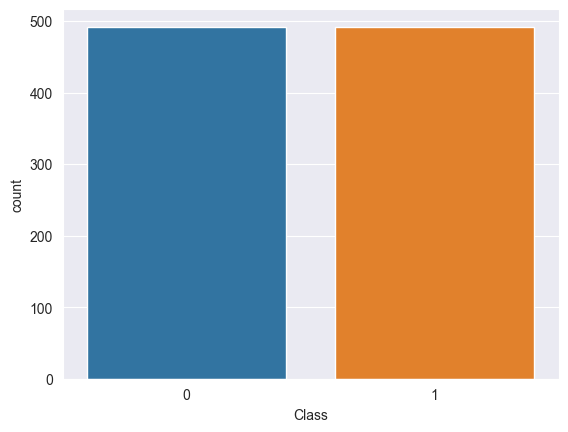

In [48]:
sns.countplot(x='Class', data=new_df)

In [49]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92321.014228,-0.019591,-0.071029,-0.014180,0.083334,-0.031301,-0.127348,0.056330,0.016567,-0.006086,...,0.000637,-0.007793,-0.013125,0.038259,0.069633,0.043515,0.013432,-0.005737,-0.012898,101.242927
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Отже, Після "зменшення" датасету він майже не змінився, але тепер він збалансований і є придатним для подальшої роботи.

In [50]:
# Splitting the data Features & Targets
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
224417  143782.0  1.809316 -0.152785 -0.893774  1.351877 -0.130544 -0.002014   
24329    33177.0 -0.474419  0.922522  2.148086  1.817205 -0.054813  0.536207   
45513    42382.0  1.200580 -0.077118  0.555955  0.570820 -0.639791 -0.646034   
216994  140721.0  1.603049 -0.472389 -2.282230  1.017753  0.050920 -1.285790   
217344  140856.0  1.862736 -1.235528 -1.566987 -0.340114 -0.620980 -0.580603   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [51]:
print(Y)

224417    0
24329     0
45513     0
216994    0
217344    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split data into Training Data & Testing Data

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

Цей код стосується поділу набору даних на навчальні та тестові зразки.

Змінні «X» і «Y» містять незалежні та залежні змінні з набору даних відповідно.

Розділимо набір даних на навчальні та тестові зразки за допомогою функції train_test_split() із бібліотеки scikit-learn.
Параметр test_size визначає відношення розміру тестової вибірки до загального розміру набору даних. У цьому випадку тестова вибірка становить 20% від загального розміру набору даних.
Параметри `stratify` дозволяють зберегти пропорції класів у навчальних і тестових вибірках. Це особливо важливо для незбалансованих наборів даних, коли один із класів має набагато меншу кількість прикладів, ніж інший.

Використання параметра "random_state" гарантує, що дії, які покладаються на генерацію випадкових чисел, виконуються з тим самим початковим числом, щоб результати можна було відтворювати від запуску до запуску програми.

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Отримуємо розмірність матриці X та двох її підмножин - X_train та X_test. Результат виводу містить 3 числа, кожне з яких вказує кількість прикладів у відповідних матрицях. Наприклад, якщо виводиться "(1000, 30) (800, 30) (200, 30)", це означає, що початкова матриця містить 1000 рядків та 30 стовпців, а її підмножини X_train та X_test містять 800 та 200 рядків відповідно, але обидві матриці мають той же розмір стовпців (30).

ModelTraining
LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
# training the logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Цей код створює об’єкт моделі логістичної регресії та навчає його на навчальних даних X_train і Y_train.
Логістична регресія — це алгоритм класифікації, який використовує логістичну функцію для прогнозування категорій вихідних значень (таких як шахрайські або нешахрайські транзакції) на основі вхідних даних (факторів).
Функція відповідності використовується для навчання моделі на навчальних даних для пошуку коефіцієнтів моделі, які допомагають робити точні прогнози на нових даних.

Model Evaluation
Accurasy Score

In [56]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Цей код виконує прогнози (prediction) для моделі "model" на даних навчання "X_train" і оцінює точність моделі на цих даних. Для цього використовується функція `predict` моделі `model`, щоб передбачити значення `Class`(випадки шахрайства чи не шахрайства) для кожного елемента даних у «X_train». Потім використовуючи функцію 'accuracy_score' з бібліотеки 'sklearn.metrics', щоб порівняти отримані значення прогнозу 'X_train_prediction' зі справжніми значеннями 'Y_train' даних навчання. Ця функція повертає точність передбачення моделі на даних навчання.Відношення кількості правильно прогнозованих значень до загальної кількості прогнозів. Результат виводиться на екран з функцією «Друк».

In [57]:
print('Accuracy on Training Data : ', training_data_accuracy)


Accuracy on Training Data :  0.940279542566709


In [58]:
# Accuracy on Test Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.9238578680203046


Це означає, що модель правильно класифікувала 91,88% тестових даних. Це дані, які не бачили під час навчання. Це хороше значення, оскільки ми не прагнемо до 100% точності, а більшість моделей машинного навчання, як правило, є менш ніж 100% точними. Це пов’язано з тим, що модель може перетренуватися на навчальних даних і втратити здатність узагальнювати нові дані. Однак на практиці точність 90-95% можна вважати дуже хорошою для розв'язання реальних проблем.

In [59]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
247995,153761.0,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.284831,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,51.37
123445,76929.0,1.089273,-0.965534,0.297149,-0.670477,-0.031334,2.341525,-1.208604,0.763060,-0.742822,...,-0.511111,-0.336314,-0.518712,0.110034,-2.230805,-0.199994,0.503424,0.064207,0.000534,58.90
48819,43798.0,1.160343,0.359262,0.598297,1.132674,-0.260771,-0.582512,0.112576,-0.128519,-0.127031,...,-0.108111,0.009131,0.128254,0.034829,0.422481,0.459278,-0.433344,0.045313,0.028447,8.01
133097,80246.0,1.117309,0.050167,0.813666,1.480090,-0.624137,-0.263828,-0.214348,0.129270,0.626680,...,-0.284593,-0.236638,-0.552943,0.129319,0.349567,0.323383,-0.515292,0.045450,0.025519,9.95
15451,26833.0,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,99.99


In [60]:
# Вибираємо випадкову транзакцію
random_transaction = X_test.sample(n=1)

# Визначаємо, чи є транзакція шахрайською завдяки навченій моделі
if model.predict(random_transaction)[0] == 0:
    transaction_type = "legitimate"
else:
    transaction_type = "fraudulent"

# Виводимо інформацію про транзакцію та її тип
print("Transaction details:")
print(random_transaction)
print("Type:", transaction_type)

Transaction details:
          Time         V1        V2         V3         V4        V5        V6  \
11880  20451.0 -15.819179  8.775997 -22.804686  11.864868 -9.092361 -2.386893   

              V7        V8        V9  ...       V20       V21       V22  \
11880 -16.560368  0.948349 -6.310658  ...  0.992279 -2.350634  1.036362   

            V23       V24       V25       V26       V27       V28  Amount  
11880  1.136051 -1.043414 -0.108923  0.657437  2.136424 -1.411945     1.0  

[1 rows x 30 columns]
Type: fraudulent


In [61]:
random_transaction = X_test.sample(n=1)
if model.predict(random_transaction)[0] == 0:
    transaction_type = "legitimate"
else:
    transaction_type = "fraudulent"

In [62]:
print("Type:", transaction_type)
print("Transaction details:")
print(random_transaction.Amount.describe())

Type: fraudulent
Transaction details:
count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Amount, dtype: float64
